# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import io


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city= citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
no_of_cities = len(cities)
len(cities)
no_of_cities

620

In [3]:
city_dictionary ={
    "city": cities,
    "country": "",
    "latitude": "",
    "longitude": "",
    "humidity": "",
    "cloudiness": "",
    "windspeed":"",
    "temperature": ""
                 }    

new_cities_df = pd.DataFrame(city_dictionary)

new_cities_df.head()


,city,country,latitude,longitude,humidity,cloudiness,windspeed,temperature
0,provideniya,,,,,,,
1,atuona,,,,,,,
2,kruisfontein,,,,,,,
3,tiksi,,,,,,,
4,vaini,,,,,,,


In [4]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"

units="imperial"
 
call_url = f"{base_url}appid={weather_api_key}&units={units}&q="    
 
# Use iterrows to iterate through pandas dataframe
for index, row in new_cities_df.iterrows():
 
    # Get city from df
    city = row['city']
   
    
    # Make API Call
   
    print(f"Retrieving Results for OpenWeather City Weather {index}.")
    response = requests.get(call_url + city).json()
    time.sleep(.15)
    
    # Get Results
    results = response['cod']
    
    try:
        print(f"City found is " + city + " with ID: " , response['id'] ) 
        
        new_cities_df.loc[index, 'country'] = response['sys']['country']
        new_cities_df.loc[index, 'latitude'] = response['coord']['lat']
        new_cities_df.loc[index, 'longitude'] = response['coord']['lon']
        new_cities_df.loc[index, 'humidity'] = response['main']['humidity']
        new_cities_df.loc[index, 'cloudiness'] = response['clouds']['all']
        new_cities_df.loc[index, 'windspeed'] = response['wind']['speed']
        new_cities_df.loc[index, 'temperature'] = response['main']['temp']
        
        
    except (KeyError, IndexError):
        print("City weather not available")
        
    print("------------")    
    
    
    

Retrieving Results for OpenWeather City Weather 0.
City found is provideniya with ID:  4031574
------------
Retrieving Results for OpenWeather City Weather 1.
City found is atuona with ID:  4020109
------------
Retrieving Results for OpenWeather City Weather 2.
City found is kruisfontein with ID:  986717
------------
Retrieving Results for OpenWeather City Weather 3.
City found is tiksi with ID:  2015306
------------
Retrieving Results for OpenWeather City Weather 4.
City found is vaini with ID:  4032243
------------
Retrieving Results for OpenWeather City Weather 5.
City found is todos santos with ID:  3981432
------------
Retrieving Results for OpenWeather City Weather 6.
City found is mar del plata with ID:  3430863
------------
Retrieving Results for OpenWeather City Weather 7.
City found is port alfred with ID:  964432
------------
Retrieving Results for OpenWeather City Weather 8.
City found is rikitea with ID:  4030556
------------
Retrieving Results for OpenWeather City Weather

City found is santa lucia with ID:  2511150
------------
Retrieving Results for OpenWeather City Weather 79.
City found is ahuimanu with ID:  5856516
------------
Retrieving Results for OpenWeather City Weather 80.
City found is mount isa with ID:  2065594
------------
Retrieving Results for OpenWeather City Weather 81.
City found is ust-omchug with ID:  2120047
------------
Retrieving Results for OpenWeather City Weather 82.
City found is port lincoln with ID:  2063036
------------
Retrieving Results for OpenWeather City Weather 83.
City weather not available
------------
Retrieving Results for OpenWeather City Weather 84.
City found is balabac with ID:  1728675
------------
Retrieving Results for OpenWeather City Weather 85.
City found is chuy with ID:  3443061
------------
Retrieving Results for OpenWeather City Weather 86.
City found is ovalle with ID:  3877918
------------
Retrieving Results for OpenWeather City Weather 87.
City found is santiago with ID:  3871336
------------
Ret

City found is kavaratti with ID:  1267390
------------
Retrieving Results for OpenWeather City Weather 157.
City weather not available
------------
Retrieving Results for OpenWeather City Weather 158.
City found is pitimbu with ID:  3391889
------------
Retrieving Results for OpenWeather City Weather 159.
City found is belaya gora with ID:  2126785
------------
Retrieving Results for OpenWeather City Weather 160.
City found is huarmey with ID:  3939168
------------
Retrieving Results for OpenWeather City Weather 161.
City found is ahipara with ID:  2194098
------------
Retrieving Results for OpenWeather City Weather 162.
City found is yar-sale with ID:  1486321
------------
Retrieving Results for OpenWeather City Weather 163.
City found is tuktoyaktuk with ID:  6170031
------------
Retrieving Results for OpenWeather City Weather 164.
City found is mollendo with ID:  3934707
------------
Retrieving Results for OpenWeather City Weather 165.
City found is vostok with ID:  2013279
--------

City found is villa carlos paz with ID:  3832791
------------
Retrieving Results for OpenWeather City Weather 236.
City found is guerrero negro with ID:  4021858
------------
Retrieving Results for OpenWeather City Weather 237.
City found is terra santa with ID:  3386467
------------
Retrieving Results for OpenWeather City Weather 238.
City found is maldonado with ID:  3441890
------------
Retrieving Results for OpenWeather City Weather 239.
City found is camabatela with ID:  2242885
------------
Retrieving Results for OpenWeather City Weather 240.
City found is santa ana with ID:  5392900
------------
Retrieving Results for OpenWeather City Weather 241.
City found is hambantota with ID:  1244926
------------
Retrieving Results for OpenWeather City Weather 242.
City weather not available
------------
Retrieving Results for OpenWeather City Weather 243.
City found is kurgan with ID:  1501321
------------
Retrieving Results for OpenWeather City Weather 244.
City found is norman wells wit

City found is sagua la grande with ID:  3541440
------------
Retrieving Results for OpenWeather City Weather 314.
City found is erzin with ID:  296852
------------
Retrieving Results for OpenWeather City Weather 315.
City weather not available
------------
Retrieving Results for OpenWeather City Weather 316.
City found is formosa do rio preto with ID:  3463124
------------
Retrieving Results for OpenWeather City Weather 317.
City found is troitsko-pechorsk with ID:  481548
------------
Retrieving Results for OpenWeather City Weather 318.
City found is kutum with ID:  371745
------------
Retrieving Results for OpenWeather City Weather 319.
City found is nueva loja with ID:  3655185
------------
Retrieving Results for OpenWeather City Weather 320.
City found is kununurra with ID:  2068110
------------
Retrieving Results for OpenWeather City Weather 321.
City found is luderitz with ID:  3355672
------------
Retrieving Results for OpenWeather City Weather 322.
City found is chadan with ID:

City found is mayumba with ID:  2399001
------------
Retrieving Results for OpenWeather City Weather 392.
City found is alofi with ID:  4036284
------------
Retrieving Results for OpenWeather City Weather 393.
City found is new glasgow with ID:  6087579
------------
Retrieving Results for OpenWeather City Weather 394.
City found is lichinga with ID:  1043893
------------
Retrieving Results for OpenWeather City Weather 395.
City found is lincolnton with ID:  4475995
------------
Retrieving Results for OpenWeather City Weather 396.
City found is mehamn with ID:  778707
------------
Retrieving Results for OpenWeather City Weather 397.
City found is antofagasta with ID:  3899539
------------
Retrieving Results for OpenWeather City Weather 398.
City found is black river with ID:  3491355
------------
Retrieving Results for OpenWeather City Weather 399.
City found is nampula with ID:  1033356
------------
Retrieving Results for OpenWeather City Weather 400.
City weather not available
-------

City found is qandala with ID:  53157
------------
Retrieving Results for OpenWeather City Weather 470.
City found is bandarbeyla with ID:  64814
------------
Retrieving Results for OpenWeather City Weather 471.
City found is shushtar with ID:  114584
------------
Retrieving Results for OpenWeather City Weather 472.
City found is mantua with ID:  3174050
------------
Retrieving Results for OpenWeather City Weather 473.
City found is maxixe with ID:  1039536
------------
Retrieving Results for OpenWeather City Weather 474.
City found is tuatapere with ID:  2180815
------------
Retrieving Results for OpenWeather City Weather 475.
City found is katherine with ID:  2068655
------------
Retrieving Results for OpenWeather City Weather 476.
City found is shetpe with ID:  608324
------------
Retrieving Results for OpenWeather City Weather 477.
City found is rocha with ID:  3440777
------------
Retrieving Results for OpenWeather City Weather 478.
City found is chigorodo with ID:  3686636
------

City found is qaqortoq with ID:  3420846
------------
Retrieving Results for OpenWeather City Weather 548.
City found is pascagoula with ID:  4440397
------------
Retrieving Results for OpenWeather City Weather 549.
City found is makhinjauri with ID:  613125
------------
Retrieving Results for OpenWeather City Weather 550.
City found is fairbanks with ID:  5861897
------------
Retrieving Results for OpenWeather City Weather 551.
City found is harrisonville with ID:  4389658
------------
Retrieving Results for OpenWeather City Weather 552.
City found is lamu with ID:  189741
------------
Retrieving Results for OpenWeather City Weather 553.
City found is ende with ID:  1644932
------------
Retrieving Results for OpenWeather City Weather 554.
City found is karymskoye with ID:  2023094
------------
Retrieving Results for OpenWeather City Weather 555.
City found is buluang with ID:  1722803
------------
Retrieving Results for OpenWeather City Weather 556.
City found is boke with ID:  242292

In [5]:
new_cities_df

,city,country,latitude,longitude,humidity,cloudiness,windspeed,temperature
0,provideniya,RU,64.3833,-173.3,65,0,22.95,4.39
1,atuona,PF,-9.8,-139.0333,78,87,15.26,77.65
2,kruisfontein,ZA,-34.0033,24.7314,95,100,13.8,71.89
3,tiksi,RU,71.6872,128.8694,99,100,6.02,-5.19
4,vaini,TO,-21.2,-175.2,83,20,3.44,78.96
...,...,...,...,...,...,...,...,...
615,gizo,SB,-8.103,156.8419,79,100,15.9,81.68
616,rudnyy,KZ,52.9594,63.1206,96,100,6.85,20.03
617,scarborough,GB,54.2797,-0.4044,87,100,7,48.58
618,waingapu,ID,-9.6567,120.2641,79,10,9.26,78.82


In [6]:
#Removing cities that were not found with 404 Error or have values on NA
nan_value = float("NaN")
new_cities_df.replace("", nan_value, inplace=True)

new_cities_df.dropna(subset = ["latitude"], inplace=True)
new_cities_df

,city,country,latitude,longitude,humidity,cloudiness,windspeed,temperature
0,provideniya,RU,64.3833,-173.3000,65.0,0.0,22.95,4.39
1,atuona,PF,-9.8000,-139.0333,78.0,87.0,15.26,77.65
2,kruisfontein,ZA,-34.0033,24.7314,95.0,100.0,13.80,71.89
3,tiksi,RU,71.6872,128.8694,99.0,100.0,6.02,-5.19
4,vaini,TO,-21.2000,-175.2000,83.0,20.0,3.44,78.96
...,...,...,...,...,...,...,...,...
615,gizo,SB,-8.1030,156.8419,79.0,100.0,15.90,81.68
616,rudnyy,KZ,52.9594,63.1206,96.0,100.0,6.85,20.03
617,scarborough,GB,54.2797,-0.4044,87.0,100.0,7.00,48.58
618,waingapu,ID,-9.6567,120.2641,79.0,10.0,9.26,78.82


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
new_cities_df.to_csv("City_Data.csv",
                header = True)

                

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#check if there are any cities with >100% humidity
humidity_check = new_cities_df["humidity"].describe(include = "all")
print("The maximum humidity value is 100, so there is no humidity value over 100 in our data set")
humidity_check

 

The maximum humidity value is 100, so there is no humidity value over 100 in our data set


count    560.000000
mean      72.517857
std       22.390014
min        7.000000
25%       61.750000
50%       77.000000
75%       90.000000
max      100.000000
Name: humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

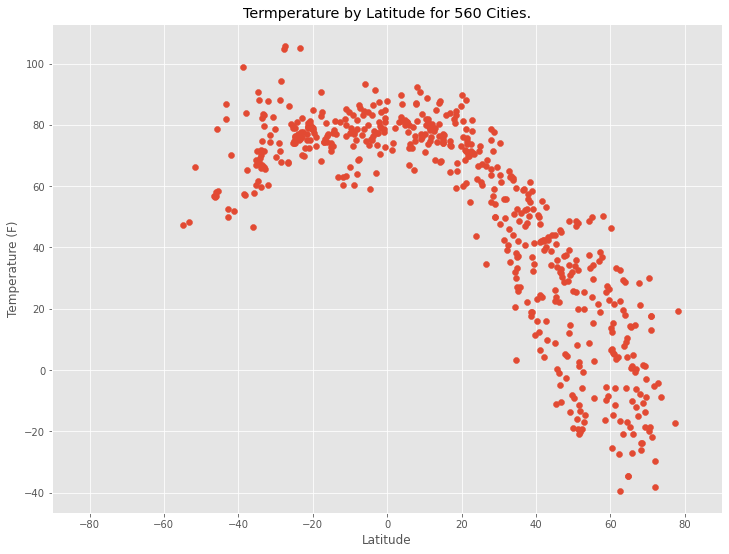

In [9]:
# Using ggplot
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size


# Print scatter plot
plt.scatter(new_cities_df["latitude"], new_cities_df["temperature"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-90,90)
plt.title(f"Termperature by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Temp_VS_Lat.png")
 

In [10]:
# This plot is showing the temperatures in random cities selected across the globe in late January based
# on the cities latitude.  The analysis # (as expected) that the temperatures gradually decrease in both the
# Northern and Southern hemisphere as you move away from the equator between 40 degrees latitude, and then
# decrease significantly in the Northen Hemisphere where they are experiencing winter.  
# Would expect to see a similar tail to the left if this was run in July in the Southern Hemisphere.

## Latitude vs. Humidity Plot

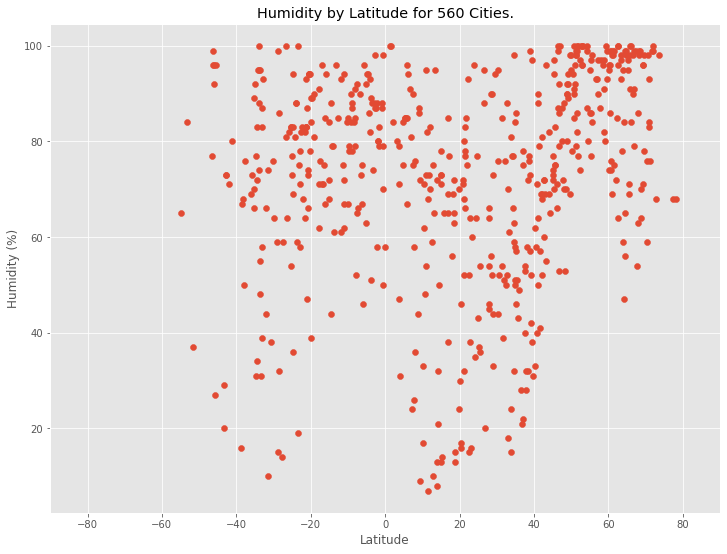

In [11]:
# Using ggplot
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size

# Print scatter plot
plt.scatter(new_cities_df["latitude"], new_cities_df["humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90,90)
plt.title(f"Humidity by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Humidity_VS_Lat.png")




In [12]:
# This chart is showing percent humidity by latitude for random cities selected across the globe.  It's  interesting 
# in that that most of the humidity values are in the 60 to 100% range with a cluster of values near 100% in the 
# Norther latutudes in the winter. This makes sense because the potential amount of water air can hold is lower at 
# lower temperatures so the denominator in the relative humidity equation is decreasing as the latitude increases.

## Latitude vs. Cloudiness Plot

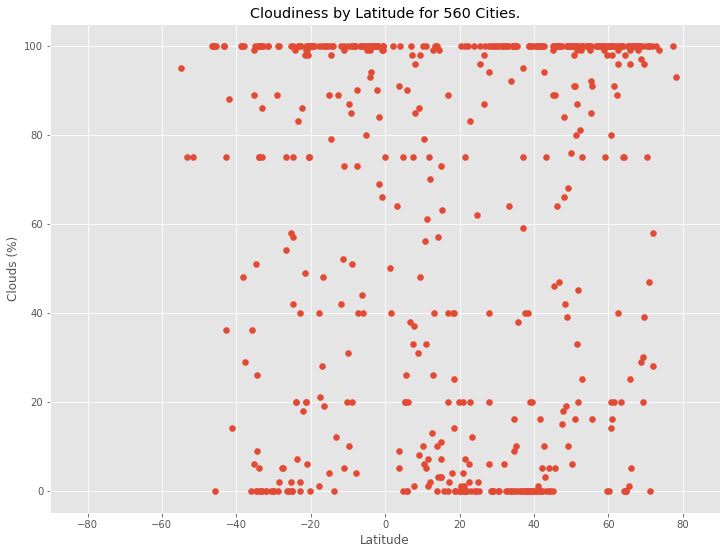

In [13]:
# Using ggplot
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size

# Print scatter plot

plt.scatter(new_cities_df["latitude"], new_cities_df["cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Clouds (%)")
plt.xlim(-90,90)
plt.title(f"Cloudiness by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Cloud_VS_Lat.png")


In [14]:
# The chart is measuring the percentage of clouds in the sky across randomly selected cities of different latitude. 
# One thing to note is that the results cluster on the upper and lower bounds which makes sense in that in many 
# cities on any given day given the weather there can be no clouds or complete cloud cover.

## Latitude vs. Wind Speed Plot

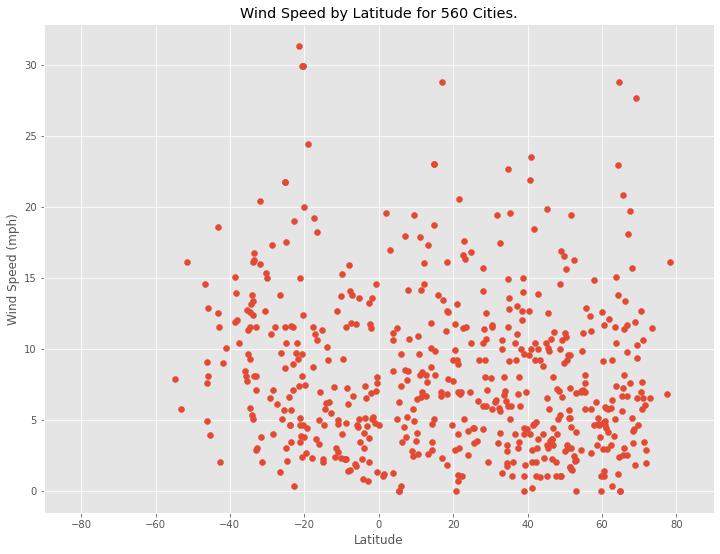

In [15]:
# Using ggplot 
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size

# Print scatter plot
plt.scatter(new_cities_df["latitude"], new_cities_df["windspeed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90,90)
plt.title(f"Wind Speed by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Wind_VS_Lat.png")
 

In [16]:
# This chart is measureing wind speed for randomly selected cities across the globe.  It's showing that wind speeds
# tend to be between 0 and 10 mph across the globe and the season, summer or winter doesn't appear to have much of an
# impact on winds.

## Linear Regression

In [17]:
# Generate North/South Hemi DF

# Southern cities

south_cities = new_cities_df.loc[new_cities_df["latitude"] <= 0]
south_cities_ct = len(south_cities)


# Northern cities

north_cities = new_cities_df.loc[new_cities_df["latitude"] > 0]
north_cities_ct = len(north_cities)

#north_cities
north_cities
#print("There are {} cities in the northern hemisphere out of {} cities total, representing {:.1%} of all cities in the data set."
#     .format(northern_cities_count, city_left_count, (northern_cities_count/city_left_count)))



,city,country,latitude,longitude,humidity,cloudiness,windspeed,temperature
0,provideniya,RU,64.3833,-173.3000,65.0,0.0,22.95,4.39
3,tiksi,RU,71.6872,128.8694,99.0,100.0,6.02,-5.19
5,todos santos,MX,23.4500,-110.2167,60.0,12.0,11.52,70.65
9,leningradskiy,RU,69.3833,178.4167,96.0,30.0,10.22,-13.70
10,palmer,US,42.1584,-72.3287,68.0,100.0,1.01,42.33
...,...,...,...,...,...,...,...,...
611,inuvik,CA,68.3499,-133.7218,98.0,100.0,4.18,-23.82
614,sri aman,MY,1.2376,111.4621,100.0,50.0,1.05,71.67
616,rudnyy,KZ,52.9594,63.1206,96.0,100.0,6.85,20.03
617,scarborough,GB,54.2797,-0.4044,87.0,100.0,7.00,48.58


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The R-value is  -0.8718140501988028


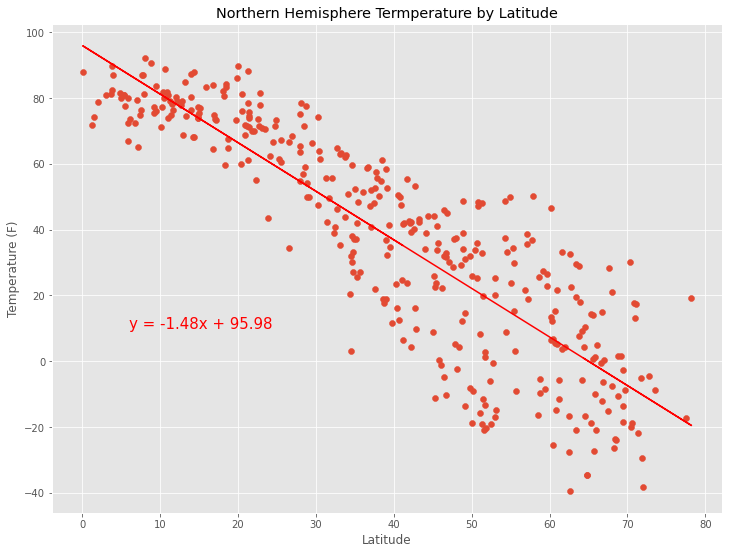

In [18]:
# Perform Regression and Plot Results

x_values = north_cities["latitude"] 
y_values = north_cities["temperature"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f" The R-value is " , rvalue)

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Northern Hemisphere Termperature by Latitude")

plt.savefig("North Temp VS Lat Reg.png")
 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The R-value is  0.3810302917669565


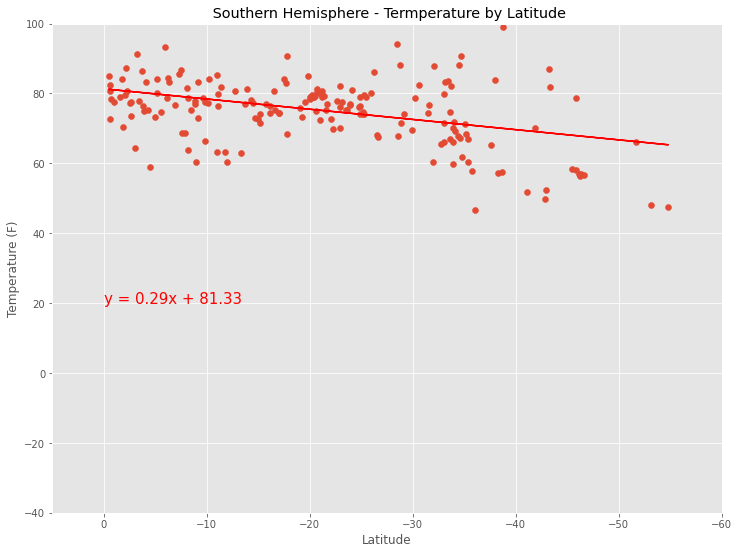

In [19]:
# Perform Regression and Plot Results

x_values = south_cities["latitude"] 
y_values = south_cities["temperature"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f" The R-value is " , rvalue)

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f" Southern Hemisphere - Termperature by Latitude")
plt.xlim([5, -60])
plt.ylim([-40,100])

plt.savefig("South Temp VS Lat Reg.png")

In [20]:
# The first thing I noticed is that the overall correlation between temperature and latitude is stong in both the
# Northern and Southern Hemispheres, as expected.  I plotted the output on the same scale so I could better see
# any differences in the regression, as before doing so, the regression looked stonger in the Norther Hemisphere. 
# Showing the results on the same Y axix scale shows that both Norther and Southern Hemisphere correlations appear 
# equally strong.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The R-value is  0.4528340620836839


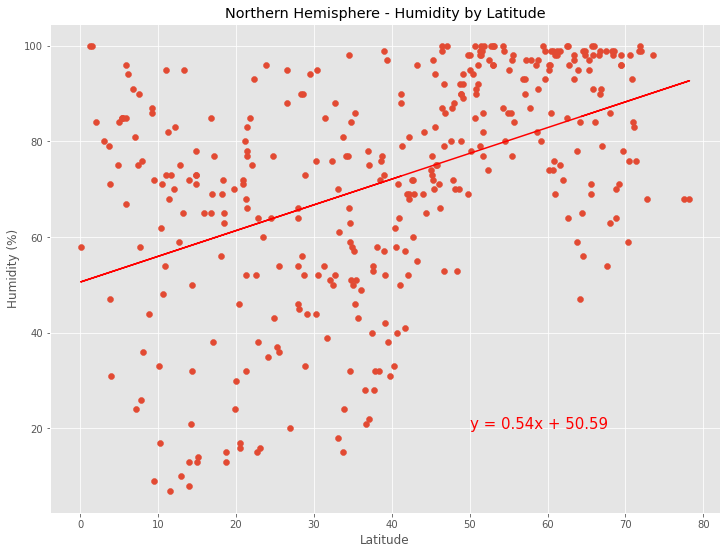

In [21]:
# Perform Regression and Plot Results

x_values = north_cities["latitude"] 
y_values = north_cities["humidity"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f" The R-value is " , rvalue)
 

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity by Latitude")

plt.savefig("North Humidity VS Lat Reg.png")
 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The R-value is  0.24994731442095203


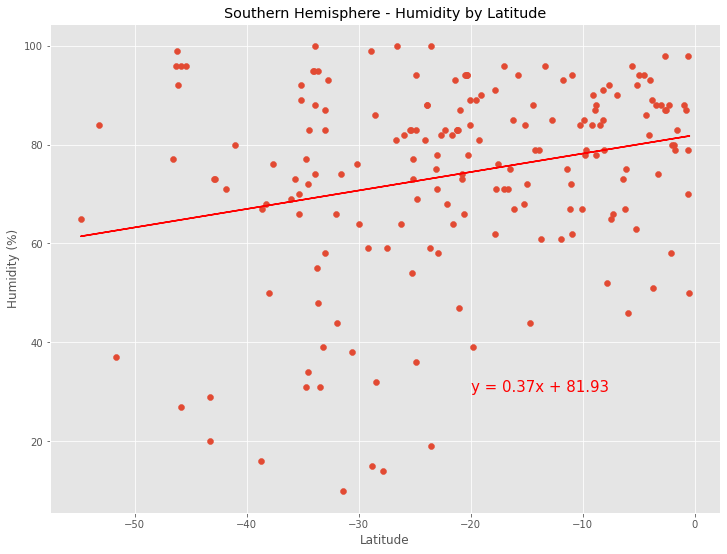

In [22]:
# Perform Regression and Plot Results

x_values = south_cities["latitude"] 
y_values = south_cities["humidity"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f" The R-value is " , rvalue)
 
# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - Humidity by Latitude")

plt.savefig("South Humidity VS Lat Reg.png")

In [23]:
# With and R-Value of .51 and .07 for the Northern and Southern Hemispheres respectively, there appears to be 
# correlation between latitude and humidity in the North but little in the South.  The higher .51 R value in the North
# as discussed above, could be explained by the fact that, given it's wintner and the cold weather season.  
# Given the potential amount of water air can hold is lower at lower temperatures, in the winter the denominator in the 
# relative humidity equation is decreasing as the latitude increases which causes the Relative Humidity numbers 
# to move toward 100% at low temperatures.  My assumption is that, if we ran this same regression in July, the Southern 
# Hemisphere's winter, we'd see the reverse of what we are seeing here, or the South correlation higher than the North.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The R-value is  0.331549814961006


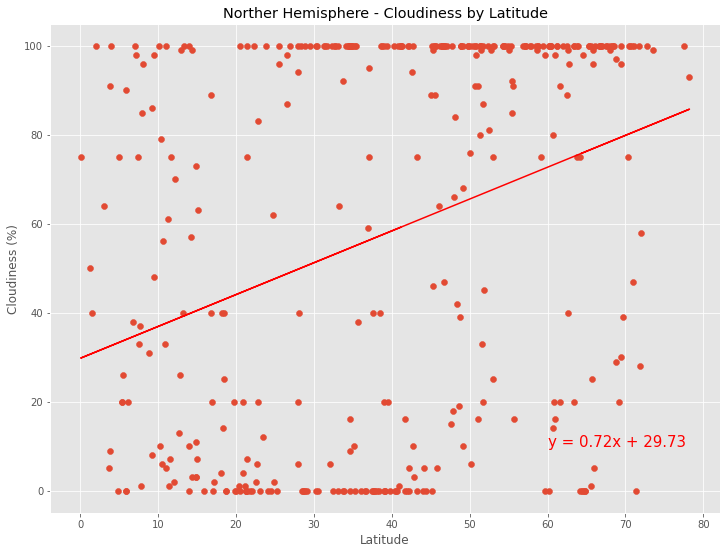

In [24]:
# Perform Regression and Plot Results

x_values = north_cities["latitude"] 
y_values = north_cities["cloudiness"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f" The R-value is " , rvalue)

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Norther Hemisphere - Cloudiness by Latitude")

plt.savefig("North Cloud VS Lat Reg.png")
 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The R-value is  0.206269259212062


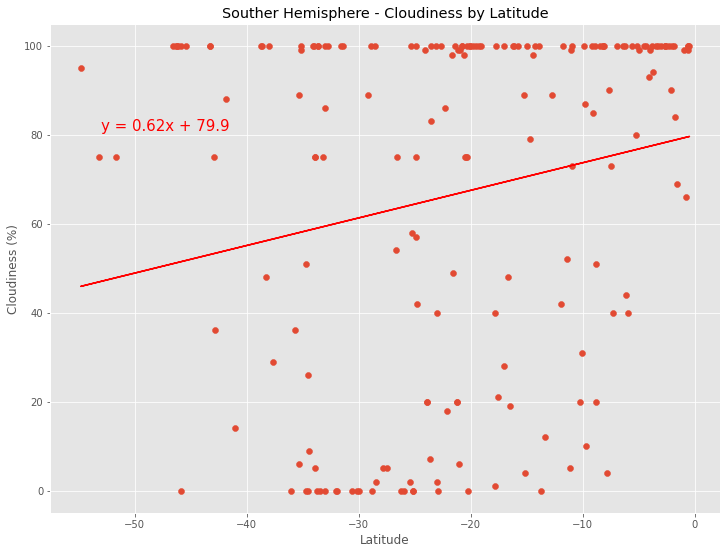

In [25]:
# Perform Regression and Plot Results

x_values = south_cities["latitude"] 
y_values = south_cities["cloudiness"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f" The R-value is " , rvalue)
      
# Print the Regression formula()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,81),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Souther Hemisphere - Cloudiness by Latitude")

plt.savefig("South Clouds VS Lat Reg.png")

In [26]:
#  There appears to be, and the R-Values of 33 and 24 confirm that there is little or no correlation between cloudiness 
#  and latitude in either hemisphere.
#  As discussed above, there is some clustering of resulting on the boundaries given the tendencies for very high p
#  pressure days to have no clouds and very low pressure days to be 100% cloudy.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

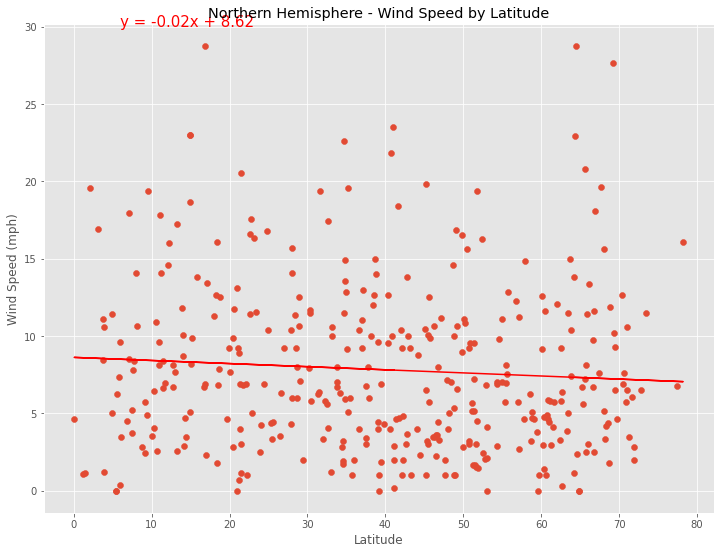

In [27]:
# Perform Regression and Plot Results

x_values = north_cities["latitude"] 
y_values = north_cities["windspeed"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere - Wind Speed by Latitude")

plt.savefig("North Wind VS Lat Reg.png")
 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

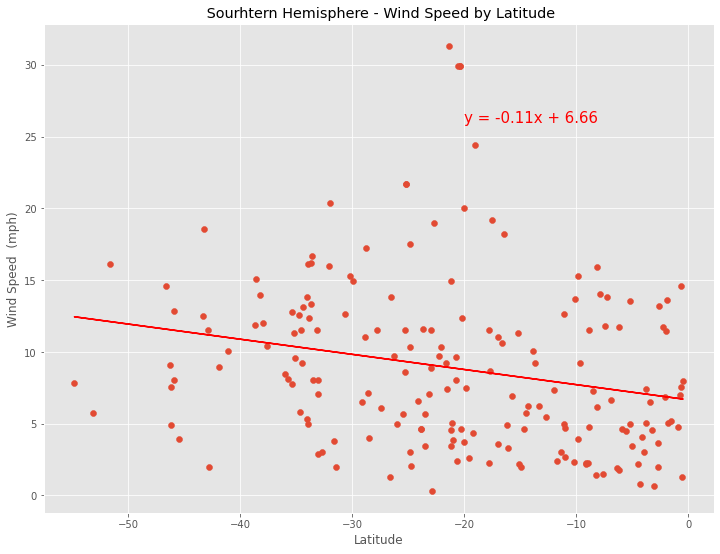

In [28]:
# Perform Regression and Plot Results

x_values = south_cities["latitude"] 
y_values = south_cities["windspeed"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,26),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed  (mph)")
plt.title(f" Sourhtern Hemisphere - Wind Speed by Latitude")

plt.savefig("South Wind VS Lat Reg.png")

In [29]:
# There appears to be very litte correlation between Wind Speed and Latitude in either hemisphere.  Winds do tend to 
# range between 0 and 10 miles per hour in both hemispheres.